In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
# %cd /content
# !unzip /content/drive/'My Drive'/'Colab Notebooks'/data.zip

In [173]:
import os 
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,AveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [174]:
classe_sign = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing veh > 3.5 tons' }

In [175]:
%cd /content/DataCNN
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        path_to_image=path+'/'+a
        image = Image.open("{}".format(path_to_image)).convert('RGB')              
        image = image.resize((32,32))
        image = np.array(image)
        #sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)


/content/DataCNN


In [176]:
label_sign=classe_sign.values()
print(label_sign)

dict_values(['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons'])


/content


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


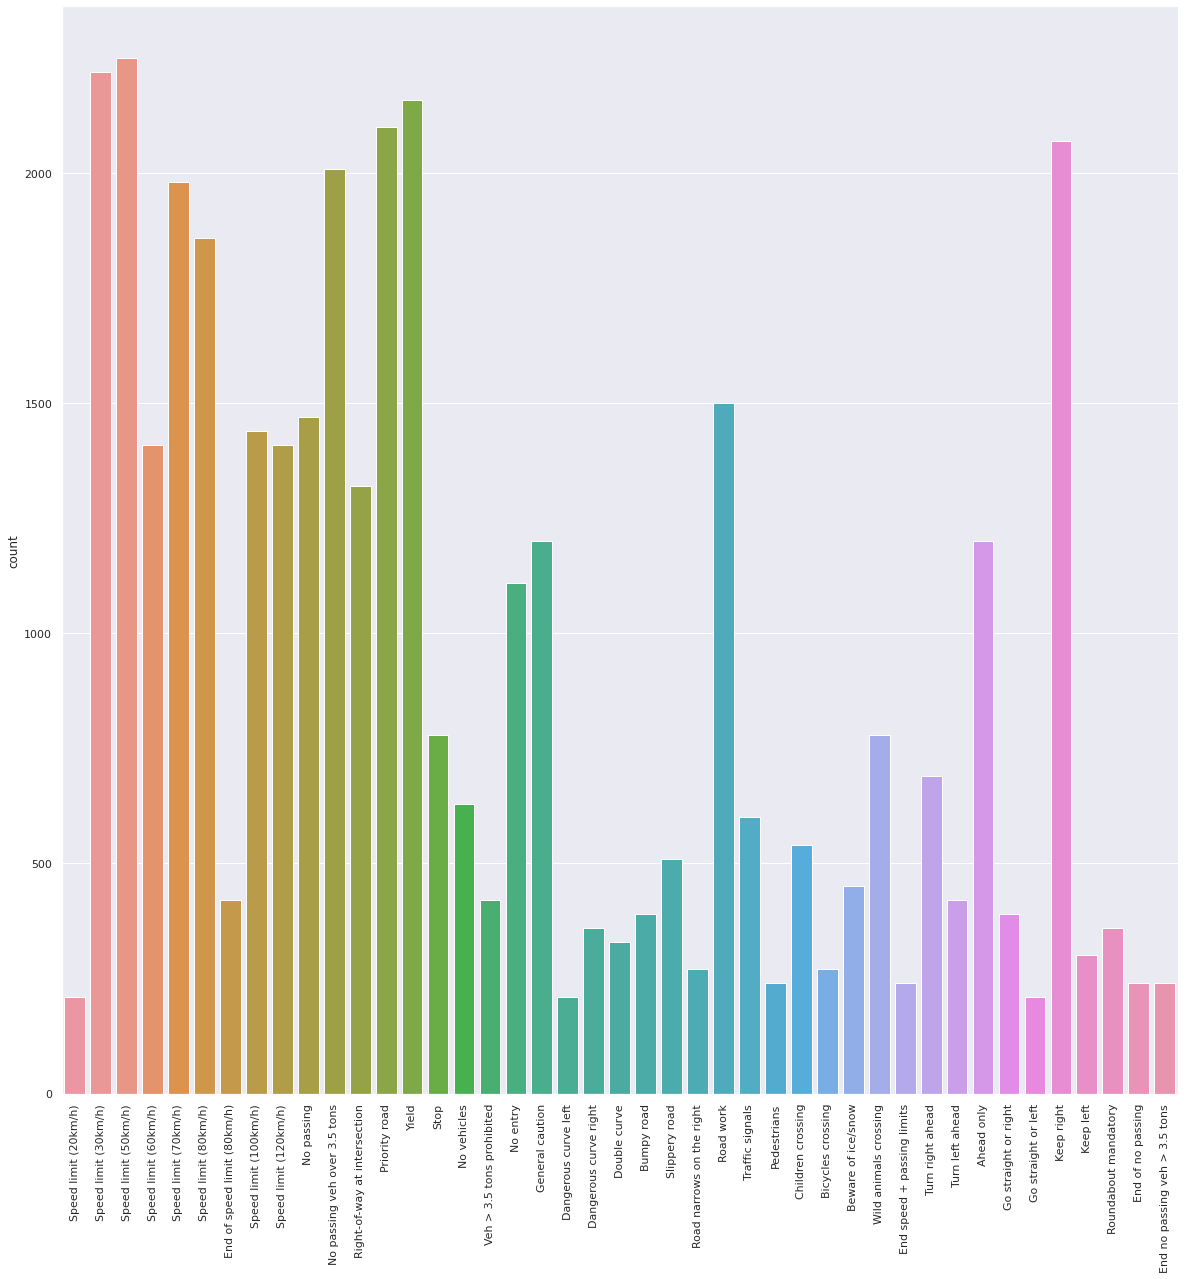

In [177]:
%cd /content
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
g=sns.countplot(labels)
g.set_xticklabels(label_sign,rotation=90)
plt.savefig("statistic.png")

In [178]:
data=np.array(data)
labels=np.array(labels)
print(data.shape)
print(labels.shape)

(39209, 32, 32, 3)
(39209,)


In [179]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(data,labels,test_size=0.2,random_state=42)

In [180]:
y_train=to_categorical(y_train,43)
y_val=to_categorical(y_val,43)
print(y_train.shape)

(31367, 43)


# Lenet-5 Architecture
- Layer C1: Convolution Layer (num_kernels=6, kernel_size=5×5, padding=0, stride=1)
- Layer S2: Average Pooling Layer (kernel_size=2×2, padding=0, stride=2)
- Layer C3: Convolution Layer (num_kernels=16, kernel_size=5×5, padding=0, stride=1)
- Layer S4: Average Pooling (kernel_size=2×2, padding=0, stride=2)
- Layer F5: Fully Connected Layer (out_features=140)
- Layer F6: Fully Connected Layer (out_features=84)
- Layer F7: Fully Connected Layer (out_features=43)

In [181]:
lenet_model=Sequential()
#32*32*3 ==> 28*28*6
lenet_model.add(Conv2D(filters=6,kernel_size=5,activation='relu',input_shape=x_train.shape[1:]))
#28*28*6 ==> 14*14*6
lenet_model.add(AveragePooling2D())
#14*14*6 ==> 10*10*16
lenet_model.add(Conv2D(filters=16,kernel_size=5,activation='relu'))
#10*10*16 ==> 5*5*16
lenet_model.add(AveragePooling2D())
lenet_model.add(Flatten())
lenet_model.add(Dense(120,activation='relu'))
lenet_model.add(Dense(80,activation='relu'))
lenet_model.add(Dense(43,activation='softmax'))
lenet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [182]:
lenet_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_28 (Dense)             (None, 80)              

In [183]:
history=lenet_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20)

Epoch 1/20
981/981 [==============================] - 4s 4ms/step - loss: 2.6726 - accuracy: 0.5561 - val_loss: 0.3302 - val_accuracy: 0.9218
Epoch 2/20
981/981 [==============================] - 3s 3ms/step - loss: 0.2801 - accuracy: 0.9283 - val_loss: 0.2171 - val_accuracy: 0.9470
Epoch 3/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1698 - accuracy: 0.9576 - val_loss: 0.1928 - val_accuracy: 0.9514
Epoch 4/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1266 - accuracy: 0.9662 - val_loss: 0.1728 - val_accuracy: 0.9572
Epoch 5/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1093 - accuracy: 0.9701 - val_loss: 0.1577 - val_accuracy: 0.9624
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1025 - accuracy: 0.9742 - val_loss: 0.1548 - val_accuracy: 0.9639
Epoch 7/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0908 - accuracy: 0.9778 - val_loss: 0.1723 - val_accuracy: 0.9633
Epoch 

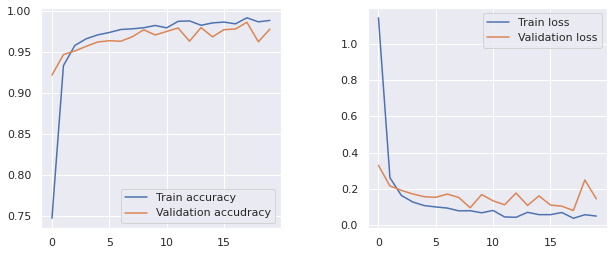

In [184]:
x_axis=np.arange(len(history.history['accuracy']))
fig=plt.subplots(figsize=(10,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.plot(x_axis,history.history[parameters[2*i]],label=name[2*i])
  plt.plot(x_axis,history.history[parameters[2*i+1]],label=name[2*i+1])
  plt.legend()

plt.tight_layout(pad=5.0)
plt.savefig("graph.png")
plt.show()

In [185]:
%cd /content/DataCNN
import pandas as pd
table=pd.read_csv('Test.csv')
labels_test=table['ClassId'].values
path_image=table['Path'].values
table.head()

/content/DataCNN


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [186]:
data_test=[]
for path in path_image:
  image=Image.open("{}".format(path))
  image=image.resize((32,32))
  data_test.append(np.array(image))

x_test_new=np.array(data_test)
labels_predict_for_test=np.argmax(lenet_model.predict(x_test_new),axis=1)
print(labels_predict_for_test.shape)
print(labels_test.shape)

(12630,)
(12630,)


In [187]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,labels_test))

Accuracy for Test: 0.9149643705463183
